# FBA on core carbon model

In [7]:
from cobra import Model,Reaction,Metabolite
model = Model ('Core Carbon model')

R1 = Reaction('R1')
R2a = Reaction('R2a')
R2b = Reaction('R2b')
R3 = Reaction('R3')
R4 = Reaction('R4')
R5a = Reaction('R5a')
R5b = Reaction('R5b')
R6 = Reaction('R6')
R7 = Reaction('R7')
R8a = Reaction('R8a')
R8b = Reaction('R8b')
Rres = Reaction('Rres')
Tc1 = Reaction('Tc1')
Tc2 = Reaction('Tc2')
Tf = Reaction('Tf')
Td = Reaction('Td')
Te = Reaction('Te')
Th = Reaction('Th')
To2 = Reaction('To2')
Gro = Reaction('Gro')
A = Metabolite('A',name = 'A',compartment ='c')
ATP = Metabolite('ATP',name = 'ATP',compartment ='c')
B = Metabolite('B',name = 'B',compartment ='c')
NADH = Metabolite('NADH',name = 'NADH',compartment ='c')
C = Metabolite('C',name = 'C',compartment ='c')
F = Metabolite('F',name = 'F',compartment ='c')
G = Metabolite('G',name = 'G',compartment ='c')
D = Metabolite('D',name = 'D',compartment ='c')
E = Metabolite('E',name = 'E',compartment ='c')
H = Metabolite('H',name = 'H',compartment ='c')
O2 = Metabolite('O2',name = 'O2',compartment ='c')
R1.add_metabolites({A:-1.0,ATP:-1.0,B:1.0})
R1.bounds = 0.,1000.
print(R1.reaction)
R2a.add_metabolites({B:-1.0,ATP:2.0,NADH:2.0,C:1.0})
print(R2a.reaction)
R2a.bounds = 0,1000.
R2b.add_metabolites({C:-1,ATP:-2,NADH:-2,B:1})
print(R2b.reaction)
R2b.bounds = 0,1000.
R3.add_metabolites({B:-1.0,F:1.0})
print(R3.reaction)
R3.bounds=0.,1000.
R4.add_metabolites({C:-1.0,G:1.0})
print(R4.reaction)
R4.bounds=0.,1000.
R5a.add_metabolites({G:-1.0,C:0.8,NADH:2.0})
print(R5a.reaction)
R5a.bounds=0.,1000.
R5b.add_metabolites({G:-1.0,C:0.8,NADH:2.0})
print(R5b.reaction)
R5b.bounds=0.,1000.
R6.add_metabolites({C:-1.0,ATP:2.0,D:3.0})
print(R6.reaction)
R6.bounds=0.,1000.
R7.add_metabolites({C:-1.0,NADH:-4.0,E:3.0})
print(R7.reaction)
R7.bounds=0.,1000.
R8a.add_metabolites({G:-1.0,ATP:-1.0,NADH:-2.0,H:1.0})
print(R8a.reaction)
R8a.bounds=0.,1000.
R8b.add_metabolites({G:1,ATP:1,NADH:2,H:-1})
print(R8b.reaction)
R8b.bounds=0.,1000.
Rres.add_metabolites({NADH:-1.0,O2:-1.0,ATP:1.0})
Rres.bounds=0.,1000.
print(Rres.reaction)
Tc1.add_metabolites({A:1.0})
print(Tc1.reaction)
Tc1.bounds=0.,10.5
Tc2.add_metabolites({A:1.0})
Tc2.bounds=0.,10.5
print(Tc2.reaction)
Tf.add_metabolites({F:1.0})
print(Tf.reaction)
Tf.bounds=0.,5.
Td.add_metabolites({D:-1.0})
print(Td.reaction)
Td.bounds=0.,12.
Te.add_metabolites({E:-1.0})
print(Te.reaction)
Te.bounds=0.,12.
Th.add_metabolites({H:1.0})
print(Th.reaction)
Th.bounds=0.,5.
To2.add_metabolites({O2:1.0})
print(To2.reaction)
To2.bounds=0.,15.
Gro.add_metabolites({C:-1.0,F:-1.0,H:-1.0,ATP:-10.0})
print(Gro.reaction)
Gro.bounds=0.,1000.

A + ATP --> B
B --> 2.0 ATP + C + 2.0 NADH
2 ATP + C + 2 NADH --> B
B --> F
C --> G
G --> 0.8 C + 2.0 NADH
G --> 0.8 C + 2.0 NADH
C --> 2.0 ATP + 3.0 D
C + 4.0 NADH --> 3.0 E
ATP + G + 2.0 NADH --> H
H --> ATP + G + 2 NADH
NADH + O2 --> ATP
 --> A
 --> A
 --> F
D --> 
E --> 
 --> H
 --> O2
10.0 ATP + C + F + H --> 


In [8]:
model.add_reactions([R1,R2a,R2b,R3,R4,R5a,R5b,R6,R7,R8a,R8b,Rres,Gro,Tc1,Tc2,Tf,Td,Te,Th,To2])

# The objects have been added to the model
print(f'{len(model.reactions)} reactions')
print(f'{len(model.metabolites)} metabolites')
print(f'{len(model.genes)} genes')

20 reactions
11 metabolites
0 genes


In [9]:
model.objective = 'Gro'
print(model.objective.expression)
print(model.objective.direction)

1.0*Gro - 1.0*Gro_reverse_4df64
max


In [10]:
model.optimize()

,fluxes,reduced_costs
R1,10.700000,0.000000e+00
R2a,10.700000,2.775558e-17
R2b,0.000000,-5.551115e-17
R3,0.000000,-2.181818e-01
R4,1.836364,-1.387779e-17
...,...,...
Tf,3.518182,0.000000e+00
Td,12.000000,2.060606e-01
Te,12.000000,8.484848e-02
Th,5.000000,-5.551115e-17


In [11]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
A,Tc1,10.5,0,0.00%
A,Tc2,0.2,0,0.00%
F,Tf,3.518,0,0.00%
H,Th,5,0,0.00%
O2,To2,15,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
D,Td,-12,0,0.00%
E,Te,-12,0,0.00%


In [12]:
from cobra.flux_analysis import flux_variability_analysis
flux_variability_analysis(model, model.reactions)

,minimum,maximum
R1,10.700000,1.570000e+01
R2a,10.700000,1.000000e+03
R2b,0.000000,9.893000e+02
R3,0.000000,-4.172588e-14
R4,1.836364,6.836364e+00
R5a,0.000000,3.318182e+00
R5b,0.000000,3.318182e+00
R6,4.000000,4.000000e+00
R7,4.000000,4.000000e+00
R8a,0.000000,1.000000e+03


# dFBA

In [51]:
from cobra import Model,Reaction,Metabolite
model = Model ('Core Carbon model')

R1 = Reaction('R1')
R2a = Reaction('R2a')
R2b = Reaction('R2b')
R3 = Reaction('R3')
R4 = Reaction('R4')
R5a = Reaction('R5a')
R5b = Reaction('R5b')
R6 = Reaction('R6')
R7 = Reaction('R7')
R8a = Reaction('R8a')
R8b = Reaction('R8b')
Rres = Reaction('Rres')
Tc1 = Reaction('Tc1')
Tc2 = Reaction('Tc2')
Tf = Reaction('Tf')
Td = Reaction('Td')
Te = Reaction('Te')
Th = Reaction('Th')
To2 = Reaction('To2')
Gro = Reaction('Gro')
A = Metabolite('A',name = 'A',compartment='c')
ATP = Metabolite('ATP',name = 'ATP',compartment='c')
B = Metabolite('B',name = 'B',compartment='c')
NADH = Metabolite('NADH',name = 'NADH',compartment='c')
C = Metabolite('C',name = 'C',compartment='c')
F = Metabolite('F',name = 'F',compartment='c')
G = Metabolite('G',name = 'G',compartment='c')
D = Metabolite('D',name = 'D',compartment='c')
E = Metabolite('E',name = 'E',compartment='c')
H = Metabolite('H',name = 'H',compartment='c')
O2 = Metabolite('O2',name = 'O2',compartment='c')
Carbon1 = Metabolite('Carbon1',name = 'A',compartment='e')
Carbon2 = Metabolite('Carbon2',name = 'A',compartment='e')
Fext = Metabolite('Fext',name = 'F',compartment='e')
Dext = Metabolite('Dext',name = 'D',compartment='e')
Eext = Metabolite('Eext',name = 'E',compartment='e')
Hext = Metabolite('Hext',name = 'H',compartment='e')
Oxygen = Metabolite('Oxygen',name = 'O2',compartment='e')
R1.add_metabolites({A:-1,ATP:-1,B:1})
print(R1.reaction)
R1.bounds = 0.,1000.
R2a.add_metabolites({B:-1,ATP:2,NADH:2,C:1})
print(R2a.reaction)
R2a.bounds = 0.,1000.
R2b.add_metabolites({C:-1,ATP:-2,NADH:-2,B:1})
print(R2b.reaction)
R2b.bounds = 0.,1000.
R3.add_metabolites({B:-1,F:1})
print(R3.reaction)
R3.bounds = 0.,1000.
R4.add_metabolites({C:-1,G:1})
print(R4.reaction)
R4.bounds = 0.,1000.
R5a.add_metabolites({G:-1,C:0.8,NADH:2})
print(R5a.reaction)
R5a.bounds = 0.,1000.
R5b.add_metabolites({G:-1,C:0.8,NADH:2})
print(R5b.reaction)
R5b.bounds = 0.,1000.
R6.add_metabolites({C:-1,ATP:2,D:3})
print(R6.reaction)
R6.bounds = 0.,1000.
R7.add_metabolites({C:-1,NADH:-4,E:3})
print(R7.reaction)
R7.bounds = 0.,1000.
R8a.add_metabolites({G:-1,ATP:-1,NADH:-2,H:1})
print(R8a.reaction)
R8a.bounds = 0.,1000.
R8b.add_metabolites({G:1,ATP:1,NADH:2,H:-1})
print(R8b.reaction)
R8b.bounds = 0.,1000.
Rres.add_metabolites({NADH:-1,O2:-1,ATP:1})
print(Rres.reaction)
Rres.bounds = 0.,1000.
Tc1.add_metabolites({Carbon1:-1,A:1})
print(Tc1.reaction)
Tc1.bounds = 0.,10.5
Tc2.add_metabolites({Carbon2:-1,A:1})
print(Tc2.reaction)
Tc2.bounds = 0.,10.5
Tf.add_metabolites({Fext:-1,F:1})
print(Tf.reaction)
Tf.bounds = 0.,5.
Td.add_metabolites({D:-1,Dext:1})
print(Td.reaction)
Td.bounds = 0.,12.
Te.add_metabolites({E:-1,Eext:1})
print(Te.reaction)
Te.bounds = 0.,12.
Th.add_metabolites({Hext:-1,H:1})
print(Th.reaction)
Th.bounds = 0.,5.
To2.add_metabolites({Oxygen:-1,O2:1})
print(To2.reaction)
To2.bounds = 0.,15.
Gro.add_metabolites({C:-1,F:-1,H:-1,ATP:-10})
print(Gro.reaction)
Gro.bounds = 0.,1000.

A + ATP --> B
B --> 2 ATP + C + 2 NADH
2 ATP + C + 2 NADH --> B
B --> F
C --> G
G --> 0.8 C + 2 NADH
G --> 0.8 C + 2 NADH
C --> 2 ATP + 3 D
C + 4 NADH --> 3 E
ATP + G + 2 NADH --> H
H --> ATP + G + 2 NADH
NADH + O2 --> ATP
Carbon1 --> A
Carbon2 --> A
Fext --> F
D --> Dext
E --> Eext
Hext --> H
Oxygen --> O2
10 ATP + C + F + H --> 


In [52]:
model.add_reactions([R1,R2a,R2b,R3,R4,R5a,R5b,R6,R7,R8a,R8b,Rres,Gro,Tc1,Tc2,Tf,Td,Te,Th,To2])

# The objects have been added to the model
print(f'{len(model.reactions)} reactions')
print(f'{len(model.metabolites)} metabolites')
print(f'{len(model.genes)} genes')

model.objective = 'Gro'
print(model.objective.expression)
print(model.objective.direction)

20 reactions
18 metabolites
0 genes
1.0*Gro - 1.0*Gro_reverse_4df64
max


In [53]:
##Adding exchange reactions for Carbon1,Carbon2,Fext and Hext and Oxygen in the growth medium
model.add_boundary(model.metabolites.get_by_id("Carbon1"), type="exchange")
model.add_boundary(model.metabolites.get_by_id("Carbon2"), type="exchange")
model.add_boundary(model.metabolites.get_by_id("Oxygen"), type="exchange")
model.add_boundary(model.metabolites.get_by_id("Fext"), type="exchange")
model.add_boundary(model.metabolites.get_by_id("Hext"), type="exchange")
model.add_boundary(model.metabolites.get_by_id("Dext"), type="exchange")
model.add_boundary(model.metabolites.get_by_id("Eext"), type="exchange")

Reaction identifier,EX_Eext
Name,E exchange
Memory address,0x024f44caf2e0
Stoichiometry,Eext <=> E <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [54]:
model.optimize()

,fluxes,reduced_costs
R1,10.700000,0.000000e+00
R2a,10.700000,0.000000e+00
R2b,0.000000,0.000000e+00
R3,0.000000,-2.181818e-01
R4,1.836364,1.387779e-17
...,...,...
EX_Oxygen,-15.000000,0.000000e+00
EX_Fext,-3.518182,-0.000000e+00
EX_Hext,-5.000000,0.000000e+00
EX_Dext,12.000000,0.000000e+00


In [55]:
model.medium

{'EX_Carbon1': 1000.0,
 'EX_Carbon2': 1000.0,
 'EX_Oxygen': 1000.0,
 'EX_Fext': 1000.0,
 'EX_Hext': 1000.0,
 'EX_Dext': 1000.0,
 'EX_Eext': 1000.0}

In [56]:
model.reactions.EX_Carbon1

Reaction identifier,EX_Carbon1
Name,A exchange
Memory address,0x024f4736d520
Stoichiometry,Carbon1 <=> A <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


# Diauxie on two carbon sources

In [57]:
medium = model.medium
medium["EX_Carbon1"] = 10
medium["EX_Carbon2"] = 10.0
medium["EX_Fext"] = 0.0
medium["EX_Hext"] = 0.0
medium["EX_Dext"] = 0.0
medium["EX_Eext"] = 0.0
model.medium = medium

model.medium

{'EX_Carbon1': 10, 'EX_Carbon2': 10.0, 'EX_Oxygen': 1000.0}

In [58]:
import numpy as np
from tqdm import tqdm
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import cobra
%matplotlib inline

def add_dynamic_bounds(model,y):
    biomass, carbon1,carbon2 = y
    carbon1_max_import = -carbon1
    carbon2_max_import = -carbon2
    model.reactions.EX_Carbon1.lower_bound = carbon1_max_import
    model.reactions.EX_Carbon2.lower_bound = carbon2_max_import
    
def dynamic_system(t,y):
    biomass, carbon1,carbon2 = y
    with model:
        add_dynamic_bounds(model,y)
        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)
        lex_constraints = cobra.util.add_lexicographic_constraints(
            model, ['Gro', 'EX_Carbon1','EX_Carbon2'], ['max', 'max','max'])

    # Since the calculated fluxes are specific rates, we multiply them by the
    # biomass concentration to get the bulk exchange rates.
    fluxes = lex_constraints.values
    fluxes *= biomass

    # This implementation is **not** efficient, so I display the current
    # simulation time using a progress bar.
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description('t = {:.3f}'.format(t))

    return fluxes

dynamic_system.pbar = None


def infeasible_event(t, y):
    """
    Determine solution feasibility.

    Avoiding infeasible solutions is handled by solve_ivp's built-in event detection.
    This function re-solves the LP to determine whether or not the solution is feasible
    (and if not, how far it is from feasibility). When the sign of this function changes
    from -epsilon to positive, we know the solution is no longer feasible.

    """

    with model:

        add_dynamic_bounds(model, y)

        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)

    return feasibility - infeasible_event.epsilon

infeasible_event.epsilon = 1E-6
infeasible_event.direction = 1
infeasible_event.terminal = True 

In [59]:
ts = np.linspace(0, 15, 100000)  # Desired integration resolution and interval
y0 = [0.1,10,10]

with tqdm() as pbar:
    dynamic_system.pbar = pbar

    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )

t = 15.000: : 632it [00:10, 61.32it/s]


In [60]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 615
     njev: 4
      nlu: 45
      sol: None
   status: 0
  success: True
        t: array([0.000000e+00, 1.500015e-04, 3.000030e-04, ..., 1.499970e+01,
       1.499985e+01, 1.500000e+01])
 t_events: [array([], dtype=float64)]
        y: array([[1.00000000e-01, 1.00047616e-01, 1.00095267e-01, ...,
        4.73616221e+00, 4.73616221e+00, 4.73616221e+00],
       [1.00000000e+01, 9.99987634e+00, 9.99975259e+00, ...,
        1.56770441e-07, 1.56770316e-07, 1.56770191e-07],
       [1.00000000e+01, 9.99984990e+00, 9.99969968e+00, ...,
        1.55403474e-07, 1.55403350e-07, 1.55403226e-07]])
 y_events: [array([], dtype=float64)]

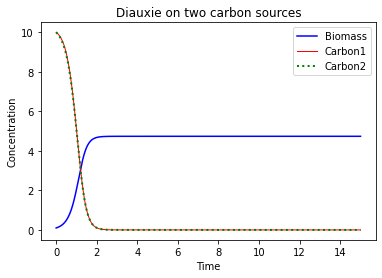

In [82]:
#Diauxie on two carbon sources
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y.T[:, 0],label='Biomass',color='b')
plt.plot(sol.t, sol.y.T[:, 1],label='Carbon1',color='r',linestyle = 'solid',linewidth = 1)
plt.plot(sol.t, sol.y.T[:, 2],label='Carbon2',color='g',linestyle='dotted',linewidth = 2)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Diauxie on two carbon sources')
plt.show()


# Growth on Carbon and Amino acid with carbon in excess

In [84]:
medium = model.medium
medium["EX_Carbon1"] = 0
medium["EX_Carbon2"] = 10.0
medium["EX_Fext"] = 0.0
medium["EX_Hext"] = 2
medium["EX_Dext"] = 0.0
medium["EX_Eext"] = 0.0
model.medium = medium

model.medium

{'EX_Carbon2': 10.0, 'EX_Oxygen': 1000.0, 'EX_Hext': 2}

In [85]:
import numpy as np
from tqdm import tqdm
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import cobra
%matplotlib inline

def add_dynamic_bounds(model,y):
    biomass,carbon2,h = y
    carbon2_max_import = -carbon2
    h_max_import = -h
    model.reactions.EX_Carbon2.lower_bound = carbon2_max_import
    model.reactions.EX_Hext.lower_bound = h_max_import
    
def dynamic_system(t,y):
    biomass,carbon2,h = y
    with model:
        add_dynamic_bounds(model,y)
        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)
        lex_constraints = cobra.util.add_lexicographic_constraints(
            model, ['Gro', 'EX_Carbon2','EX_Hext'], ['max', 'max','max'])

    # Since the calculated fluxes are specific rates, we multiply them by the
    # biomass concentration to get the bulk exchange rates.
    fluxes = lex_constraints.values
    fluxes *= biomass

    # This implementation is **not** efficient, so I display the current
    # simulation time using a progress bar.
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description('t = {:.3f}'.format(t))

    return fluxes

dynamic_system.pbar = None


def infeasible_event(t, y):
    """
    Determine solution feasibility.

    Avoiding infeasible solutions is handled by solve_ivp's built-in event detection.
    This function re-solves the LP to determine whether or not the solution is feasible
    (and if not, how far it is from feasibility). When the sign of this function changes
    from -epsilon to positive, we know the solution is no longer feasible.

    """

    with model:

        add_dynamic_bounds(model, y)

        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)

    return feasibility - infeasible_event.epsilon

infeasible_event.epsilon = 1E-6
infeasible_event.direction = 1
infeasible_event.terminal = True 


ts = np.linspace(0, 15, 100000)  # Desired integration resolution and interval
y0 = [0.1,10,2]

with tqdm() as pbar:
    dynamic_system.pbar = pbar

    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )
    
sol

t = 15.000: : 571it [00:09, 60.58it/s]


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 547
     njev: 6
      nlu: 43
      sol: None
   status: 0
  success: True
        t: array([0.000000e+00, 1.500015e-04, 3.000030e-04, ..., 1.499970e+01,
       1.499985e+01, 1.500000e+01])
 t_events: [array([], dtype=float64)]
        y: array([[ 1.00000000e-01,  1.00040022e-01,  1.00080080e-01, ...,
         3.20953361e+00,  3.20953361e+00,  3.20953361e+00],
       [ 1.00000000e+01,  9.99984992e+00,  9.99969970e+00, ...,
        -9.93228935e-13, -9.88144591e-13, -9.83060248e-13],
       [ 2.00000000e+00,  1.99996998e+00,  1.99993994e+00, ...,
         6.15959299e-13,  6.15744758e-13,  6.15530218e-13]])
 y_events: [array([], dtype=float64)]

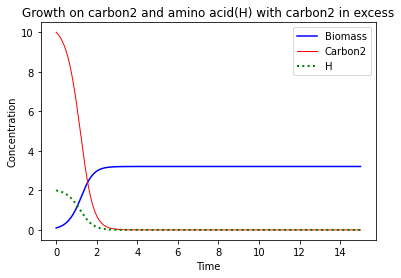

In [86]:
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y.T[:, 0],label='Biomass',color='b')
plt.plot(sol.t, sol.y.T[:, 1],label='Carbon2',color='r',linestyle = 'solid',linewidth = 1)
plt.plot(sol.t, sol.y.T[:, 2],label='H',color='g',linestyle='dotted',linewidth = 2)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Growth on carbon2 and amino acid(H) with carbon2 in excess')
plt.show()


# Growth on Carbon and Amino acid with amino acid in excess

In [87]:
medium = model.medium
medium["EX_Carbon1"] = 0
medium["EX_Carbon2"] = 5.0
medium["EX_Fext"] = 0.0
medium["EX_Hext"] = 10.0
medium["EX_Dext"] = 0.0
medium["EX_Eext"] = 0.0
model.medium = medium

model.medium

{'EX_Carbon2': 5.0, 'EX_Oxygen': 1000.0, 'EX_Hext': 10.0}

In [88]:
import numpy as np
from tqdm import tqdm
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import cobra
%matplotlib inline

def add_dynamic_bounds(model,y):
    biomass,carbon2,h = y
    carbon2_max_import = -carbon2
    h_max_import = -h
    model.reactions.EX_Carbon2.lower_bound = carbon2_max_import
    model.reactions.EX_Hext.lower_bound = h_max_import
    
def dynamic_system(t,y):
    biomass,carbon2,h = y
    with model:
        add_dynamic_bounds(model,y)
        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)
        lex_constraints = cobra.util.add_lexicographic_constraints(
            model, ['Gro', 'EX_Carbon2','EX_Hext'], ['max', 'max','max'])

    # Since the calculated fluxes are specific rates, we multiply them by the
    # biomass concentration to get the bulk exchange rates.
    fluxes = lex_constraints.values
    fluxes *= biomass

    # This implementation is **not** efficient, so I display the current
    # simulation time using a progress bar.
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description('t = {:.3f}'.format(t))

    return fluxes

dynamic_system.pbar = None


def infeasible_event(t, y):
    """
    Determine solution feasibility.

    Avoiding infeasible solutions is handled by solve_ivp's built-in event detection.
    This function re-solves the LP to determine whether or not the solution is feasible
    (and if not, how far it is from feasibility). When the sign of this function changes
    from -epsilon to positive, we know the solution is no longer feasible.

    """

    with model:

        add_dynamic_bounds(model, y)

        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)

    return feasibility - infeasible_event.epsilon

infeasible_event.epsilon = 1E-6
infeasible_event.direction = 1
infeasible_event.terminal = True 


ts = np.linspace(0, 15, 100000)  # Desired integration resolution and interval
y0 = [0.1,5,10]

with tqdm() as pbar:
    dynamic_system.pbar = pbar

    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )
    
sol

t = 15.000: : 627it [00:10, 60.34it/s]


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 602
     njev: 6
      nlu: 46
      sol: None
   status: 0
  success: True
        t: array([0.000000e+00, 1.500015e-04, 3.000030e-04, ..., 1.499970e+01,
       1.499985e+01, 1.500000e+01])
 t_events: [array([], dtype=float64)]
        y: array([[1.00000000e-01, 1.00034149e-01, 1.00068333e-01, ...,
        3.98436893e+00, 3.98436893e+00, 3.98436893e+00],
       [5.00000000e+00, 4.99992497e+00, 4.99984986e+00, ...,
        1.56012335e-07, 1.56012334e-07, 1.56012333e-07],
       [1.00000000e+01, 9.99992497e+00, 9.99984986e+00, ...,
        4.24080017e-07, 4.24080015e-07, 4.24080012e-07]])
 y_events: [array([], dtype=float64)]

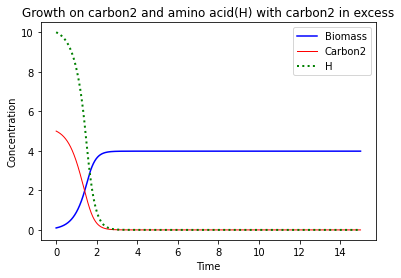

In [89]:
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y.T[:, 0],label='Biomass',color='b')
plt.plot(sol.t, sol.y.T[:, 1],label='Carbon2',color='r',linestyle = 'solid',linewidth = 1)
plt.plot(sol.t, sol.y.T[:, 2],label='H',color='g',linestyle='dotted',linewidth = 2)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Growth on carbon2 and amino acid(H) with carbon2 in excess')
plt.show()


# Anaerobic Growth with Carbon2

In [90]:
medium = model.medium
medium["EX_Carbon1"] = 0
medium["EX_Carbon2"] = 10.0
medium["EX_Fext"] = 0.0
medium["EX_Hext"] = 0.0
medium["EX_Dext"] = 0.0
medium["EX_Eext"] = 0.0
medium["EX_Oxygen"] = 0.0
model.medium = medium

model.medium

{'EX_Carbon2': 10.0}

In [91]:
import numpy as np
from tqdm import tqdm
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import cobra
%matplotlib inline

def add_dynamic_bounds(model,y):
    biomass, carbon2 = y
    carbon2_max_import = -carbon2
    model.reactions.EX_Carbon2.lower_bound = carbon2_max_import
    
def dynamic_system(t,y):
    biomass, carbon2 = y
    with model:
        add_dynamic_bounds(model,y)
        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)
        lex_constraints = cobra.util.add_lexicographic_constraints(
            model, ['Gro','EX_Carbon2'], [ 'max','max'])

    # Since the calculated fluxes are specific rates, we multiply them by the
    # biomass concentration to get the bulk exchange rates.
    fluxes = lex_constraints.values
    fluxes *= biomass

    # This implementation is **not** efficient, so I display the current
    # simulation time using a progress bar.
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description('t = {:.3f}'.format(t))

    return fluxes

dynamic_system.pbar = None


def infeasible_event(t, y):
    """
    Determine solution feasibility.

    Avoiding infeasible solutions is handled by solve_ivp's built-in event detection.
    This function re-solves the LP to determine whether or not the solution is feasible
    (and if not, how far it is from feasibility). When the sign of this function changes
    from -epsilon to positive, we know the solution is no longer feasible.

    """

    with model:

        add_dynamic_bounds(model, y)

        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)

    return feasibility - infeasible_event.epsilon

infeasible_event.epsilon = 1E-6
infeasible_event.direction = 1
infeasible_event.terminal = True 

ts = np.linspace(0, 15, 100000)  # Desired integration resolution and interval
y0 = [0.1,10]

with tqdm() as pbar:
    dynamic_system.pbar = pbar

    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )
    
sol

t = 15.000: : 363it [00:05, 61.89it/s]


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 357
     njev: 2
      nlu: 29
      sol: None
   status: 0
  success: True
        t: array([0.000000e+00, 1.500015e-04, 3.000030e-04, ..., 1.499970e+01,
       1.499985e+01, 1.500000e+01])
 t_events: [array([], dtype=float64)]
        y: array([[1.00000000e-01, 1.00017650e-01, 1.00035310e-01, ...,
        1.27647052e+00, 1.27647052e+00, 1.27647052e+00],
       [1.00000000e+01, 9.99984998e+00, 9.99969986e+00, ...,
        6.22178087e-07, 6.22058968e-07, 6.21939871e-07]])
 y_events: [array([], dtype=float64)]

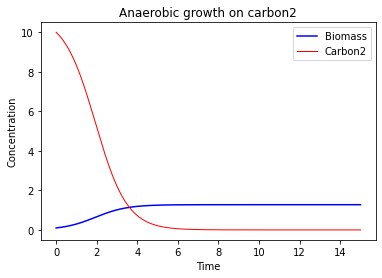

In [92]:
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y.T[:, 0],label='Biomass',color='b')
plt.plot(sol.t, sol.y.T[:, 1],label='Carbon2',color='r',linestyle = 'solid',linewidth = 1)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Anaerobic growth on carbon2')
plt.show()

# Growth in a complex medium

In [93]:
medium = model.medium
medium["EX_Carbon1"] = 1
medium["EX_Carbon2"] = 10.0
medium["EX_Fext"] = 0.1
medium["EX_Hext"] = 2.5
medium["EX_Dext"] = 0.0
medium["EX_Eext"] = 0.0
medium["EX_Oxygen"] = 1000.0
model.medium = medium

model.medium

{'EX_Carbon1': 1,
 'EX_Carbon2': 10.0,
 'EX_Oxygen': 1000.0,
 'EX_Fext': 0.1,
 'EX_Hext': 2.5}

In [94]:
import numpy as np
from tqdm import tqdm
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import cobra
%matplotlib inline

def add_dynamic_bounds(model,y):
    biomass, carbon1,carbon2,f,h = y
    carbon2_max_import = -carbon2
    model.reactions.EX_Carbon2.lower_bound = carbon2_max_import
    carbon1_max_import = -carbon1
    model.reactions.EX_Carbon1.lower_bound = carbon1_max_import
    f_max_import = -f
    model.reactions.EX_Fext.lower_bound = f_max_import
    h_max_import = -h
    model.reactions.EX_Hext.lower_bound = h_max_import
    
    
def dynamic_system(t,y):
    biomass, carbon1,carbon2,f,h = y
    with model:
        add_dynamic_bounds(model,y)
        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)
        lex_constraints = cobra.util.add_lexicographic_constraints(
            model, ['Gro','EX_Carbon1','EX_Carbon2','EX_Fext','EX_Hext'], [ 'max','max','max','max','max','max'])

    # Since the calculated fluxes are specific rates, we multiply them by the
    # biomass concentration to get the bulk exchange rates.
    fluxes = lex_constraints.values
    fluxes *= biomass

    # This implementation is **not** efficient, so I display the current
    # simulation time using a progress bar.
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description('t = {:.3f}'.format(t))

    return fluxes

dynamic_system.pbar = None


def infeasible_event(t, y):
    """
    Determine solution feasibility.

    Avoiding infeasible solutions is handled by solve_ivp's built-in event detection.
    This function re-solves the LP to determine whether or not the solution is feasible
    (and if not, how far it is from feasibility). When the sign of this function changes
    from -epsilon to positive, we know the solution is no longer feasible.

    """

    with model:

        add_dynamic_bounds(model, y)

        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)

    return feasibility - infeasible_event.epsilon

infeasible_event.epsilon = 1E-6
infeasible_event.direction = 1
infeasible_event.terminal = True 

ts = np.linspace(0, 15, 100000)  # Desired integration resolution and interval
y0 = [0.1,1,10,0.1,2.5]

with tqdm() as pbar:
    dynamic_system.pbar = pbar

    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )
    
sol

t = 15.000: : 615it [00:11, 55.83it/s]


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 573
     njev: 7
      nlu: 48
      sol: None
   status: 0
  success: True
        t: array([0.000000e+00, 1.500015e-04, 3.000030e-04, ..., 1.499970e+01,
       1.499985e+01, 1.500000e+01])
 t_events: [array([], dtype=float64)]
        y: array([[1.00000000e-01, 1.00042371e-01, 1.00084786e-01, ...,
        3.55784386e+00, 3.55784386e+00, 3.55784386e+00],
       [1.00000000e+00, 9.99984992e-01, 9.99969968e-01, ...,
        1.79518355e-07, 1.79518355e-07, 1.79518355e-07],
       [1.00000000e+01, 9.99984992e+00, 9.99969968e+00, ...,
        1.79518355e-06, 1.79518355e-06, 1.79518355e-06],
       [1.00000000e-01, 9.99984992e-02, 9.99969968e-02, ...,
        1.79518355e-08, 1.79518355e-08, 1.79518355e-08],
       [2.50000000e+00, 2.49996248e+00, 2.49992492e+00, ...,
        4.48795887e-07, 4.48795887e-07, 4.48795887e-07]])
 y_events: [array([], dtype=float64)]

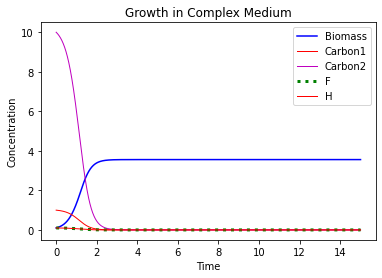

In [98]:
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y.T[:, 0],label='Biomass',color='b')
plt.plot(sol.t, sol.y.T[:, 1],label='Carbon1',color='r',linestyle = 'solid',linewidth = 1)
plt.plot(sol.t, sol.y.T[:, 2],label='Carbon2',color='m',linestyle = 'solid',linewidth = 1)
plt.plot(sol.t, sol.y.T[:, 3],label='F',color='g',linestyle = 'dotted',linewidth = 3)
plt.plot(sol.t, sol.y.T[:, 3],label='H',color='r',linestyle = 'solid',linewidth = 1)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Growth in Complex Medium')
plt.show()